# Лабораторная работа №3

## Набор данных Students Performance in Exams (Успеваемость студентов на экзаменах)

Выгрузка данных из CSV файла в датафрейм

In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
df = pd.read_csv("..//..//static//csv//StudentsPerformance.csv")

# Вывод колонок
print(df.columns)

print()

df.info()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Описание набора  

Контекст
Оценки, полученные студентами

Содержание
Этот набор данных состоит из оценок, полученных учащимися по различным предметам.

Вдохновение
Понять влияние происхождения родителей, подготовки к тестированию и т. д. на успеваемость учащихся.

In [364]:
# Вывод столбцов
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [365]:
# Краткая статистическая сводка для данных:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

### Анализ содержимого

*Объекты наблюдения:* студенты, участвующие в экзаменах.

*Атрибуты объектов:* 

1. gender — пол: определяет гендерную принадлежность студента (мужской, женский).  
2. race/ethnicity — этническая принадлежность: группа, к которой относится студент (например, различные расовые/этнические категории).  
3. parental level of education — уровень образования родителей(например, среднее образование, высшее образование и т.д.).  
4. lunch — тип обеда: информация о том, получает ли студент бесплатный или платный обед.  
5. test preparation course — курс подготовки к тесту
6. math score  — результаты экзаменов по математике.
7. reading score — результаты экзаменов по чтению.
8. writing score — результаты экзаменов по письму.


### Бизнес-цель
1.  Анализ факторов, влияющих на успеваемость студентов:

    **Цель:** Исследовать, как различные факторы, такие как пол, этническая принадлежность, уровень образования родителей, тип обеда и наличие курса подготовки к тесту, влияют на оценки студентов по математике, чтению и письму.

    **Эффект:** Это поможет образовательным учреждениям и политикам лучше понять, какие аспекты могут быть улучшены для повышения успеваемости студентов, а также выявить возможные неравенства в образовательных возможностях.

2.  Прогнозирование успеваемости студентов

    **Цель:** Разработать модель прогнозирования успеваемости студентов на основе имеющихся данных, таких как пол, раса/этническая принадлежность, уровень образования родителей, тип обеда и участие в подготовительных курсах.

    **Эффект:** Это позволит предсказать, какие студенты могут столкнуться с трудностями в обучении, и принять меры для их поддержки. Например, образовательные учреждения могут инициировать дополнительные занятия или индивидуальные консультации для студентов, у которых ожидаются низкие результаты на экзаменах, тем самым повышая их шансы на успешную сдачу экзаменов.

### Техническая цель
1.  Разработка системы анализа факторов успеваемости студентов:

    **Цель:** Создать аналитическую платформу, которая будет собирать, обрабатывать и визуализировать данные о студентах, включая их оценки и соответствующие факторы (пол, этническая принадлежность, уровень образования родителей, тип обеда, наличие подготовительных курсов).

2.  Создание модели прогнозирования успеваемости студентов:

    **Цель:** Разработать и внедрить предсказательную модель, которая будет оценивать вероятную успеваемость студентов на основании их характеристик и данных.



### Анализ данных 

In [366]:
# Проверка на пропущенные данные
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Нет пропущенных данных

gender — пол: определяет гендерную принадлежность студента (мужской, женский).  
race/ethnicity — этническая принадлежность: группа, к которой относится студент (например, различные расовые/этнические категории).  
parental level of education — уровень образования родителей(например, среднее образование, высшее образование и т.д.).  
lunch — тип обеда: информация о том, получает ли студент бесплатный или платный обед.  
test preparation course — курс подготовки к тесту
math score  — результаты экзаменов по математике.
reading score — результаты экзаменов по чтению.
writing score — результаты экзаменов по письму.

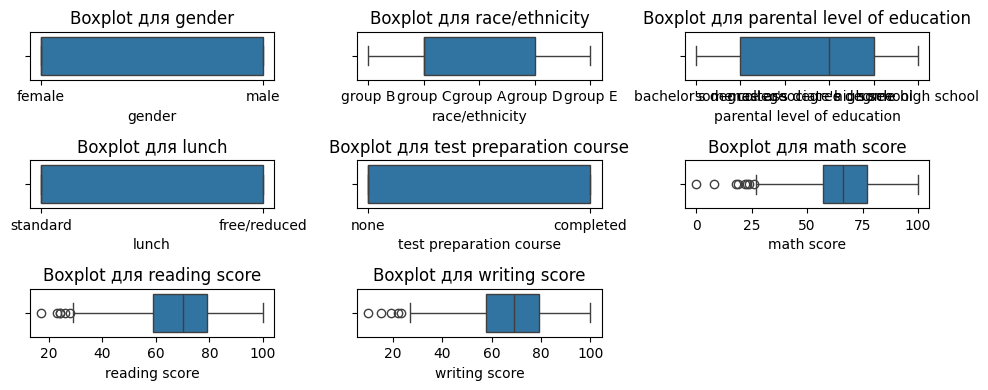

In [367]:
# Построим графики boxplot для обнаружения выбросов по каждой характеристике
plt.figure(figsize=(10, 10))

# Создание boxplot
for i, column in enumerate(['gender', 'race/ethnicity','parental level of education','lunch','test preparation course','math score','reading score','writing score'], 1):
    plt.subplot(8, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot для {column}")
    
plt.tight_layout()
plt.show()

Для автоматического анализа выбросов мы можем использовать несколько методов, которые помогут оценить, являются ли данные выбросами и какие из них стоит оставить или удалить. Давайте используем следующие подходы:

Метод межквартильного размаха (IQR) — это один из самых популярных способов для обнаружения выбросов. Мы будем искать значения, которые выходят за пределы 
1.5×IQR, где IQR — это разница между 75-м и 25-м процентилем данных.

Z-оценка — этот метод позволяет определить, насколько отклоняется значение от среднего в терминах стандартного отклонения. Обычно выбросами считаются значения, для которых Z-оценка больше 3 или меньше -3.

In [368]:
import numpy as np

# Функция для поиска выбросов по методу IQR
def find_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Функция для поиска выбросов по методу Z-оценки
def find_outliers_z(df, columns, threshold=3):
    outliers = {}
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        outliers[column] = df[np.abs(z_scores) > threshold]
    return outliers

# Вычисление выбросов для математических, чтения и письма
columns_to_check = ['math score', 'reading score', 'writing score']
outliers_iqr = find_outliers_iqr(df, columns_to_check)
outliers_z = find_outliers_z(df, columns_to_check)

# Выводим результаты
print("Выбросы по методу IQR:")
for col, data in outliers_iqr.items():
    print(f"{col}: {data.shape[0]} выбросов")

print("\nВыбросы по методу Z-оценки:")
for col, data in outliers_z.items():
    print(f"{col}: {data.shape[0]} выбросов")


Выбросы по методу IQR:
math score: 8 выбросов
reading score: 6 выбросов
writing score: 5 выбросов

Выбросы по методу Z-оценки:
math score: 4 выбросов
reading score: 4 выбросов
writing score: 4 выбросов


Так как выбросы по Z-оценке и IQR частично совпадают, это подтверждает их значимость в данных.

Попробуем решить устранить проблему выбросов для writing score и reading score и math score, заменив их на медиану. 

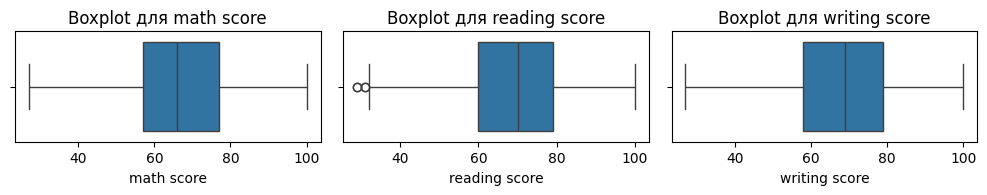

In [369]:
# Функция для замены выбросов на медиану
def replace_outliers_with_median(df, columns):
    for column in columns:
        # Находим границы по методу IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Заменяем выбросы на медиану
        median = df[column].median()
        df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    
    return df

# Заменим выбросы на медиану для баллов
df = replace_outliers_with_median(df.copy(), columns_to_check)


# Построим графики для проверки
plt.figure(figsize=(10, 5))

# Создание boxplot
for i, column in enumerate(['math score','reading score','writing score'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot для {column}")
    
plt.tight_layout()
plt.show()


### Связи между объектами:

 Анализ данных покажет, как каждый из атрибутов (пол, этническая принадлежность, уровень образования родителей, тип обеда, курс подготовки) влияет на оценки студентов, что поможет выявить ключевые факторы, способствующие или препятствующие успеваемости.

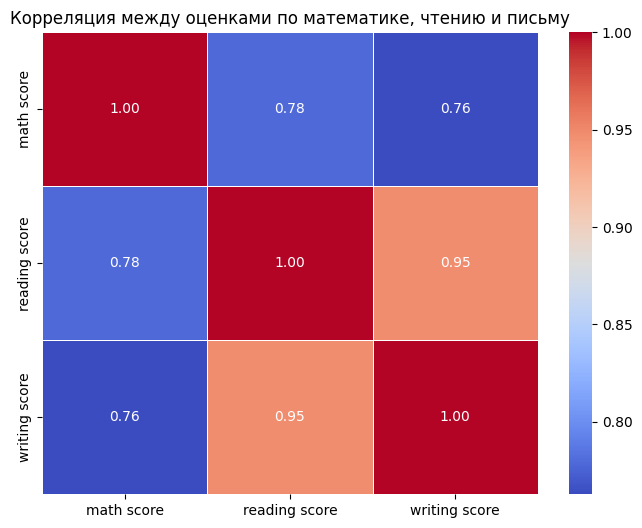

In [370]:
# Расчет корреляции между оценками по математике, чтению и письму
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()

# Визуализация матрицы корреляций
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляция между оценками по математике, чтению и письму')
plt.show()


Корреляция между всеми тремя оценками высока, особенно между оценками по чтению и письму (0.95), а также между чтением и математикой (0.78). Это говорит о том, что студенты, которые показывают высокие результаты в одном из этих предметов, обычно показывают хорошие результаты и в других предметах.

Математика имеет наиболее слабую корреляцию с другими предметами (0.78 и 0.76), но все равно достаточно значимую. Это может означать, что успехи в математике несколько менее связаны с успехами в чтении и письме, чем между чтением и письмом, но все же есть определенная связь.

Чтение и письмо имеют почти идеальную корреляцию (0.95), что указывает на очень высокую взаимосвязь между этими двумя видами деятельности. Это может свидетельствовать о том, что навыки, необходимые для хорошего выполнения задания по чтению, схожи с теми, что необходимы для успешного написания текста.

Если целью является улучшение успеваемости студентов, стоит сосредоточиться на факторах, которые могут улучшить все три навыка одновременно. Например, можно обратить внимание на методы, развивающие как читаемость, так и письмо, так как они сильно взаимосвязаны.
Математика может потребовать отдельного внимания или подхода, так как ее корреляция с чтением и письмом ниже, чем между чтением и письмом.

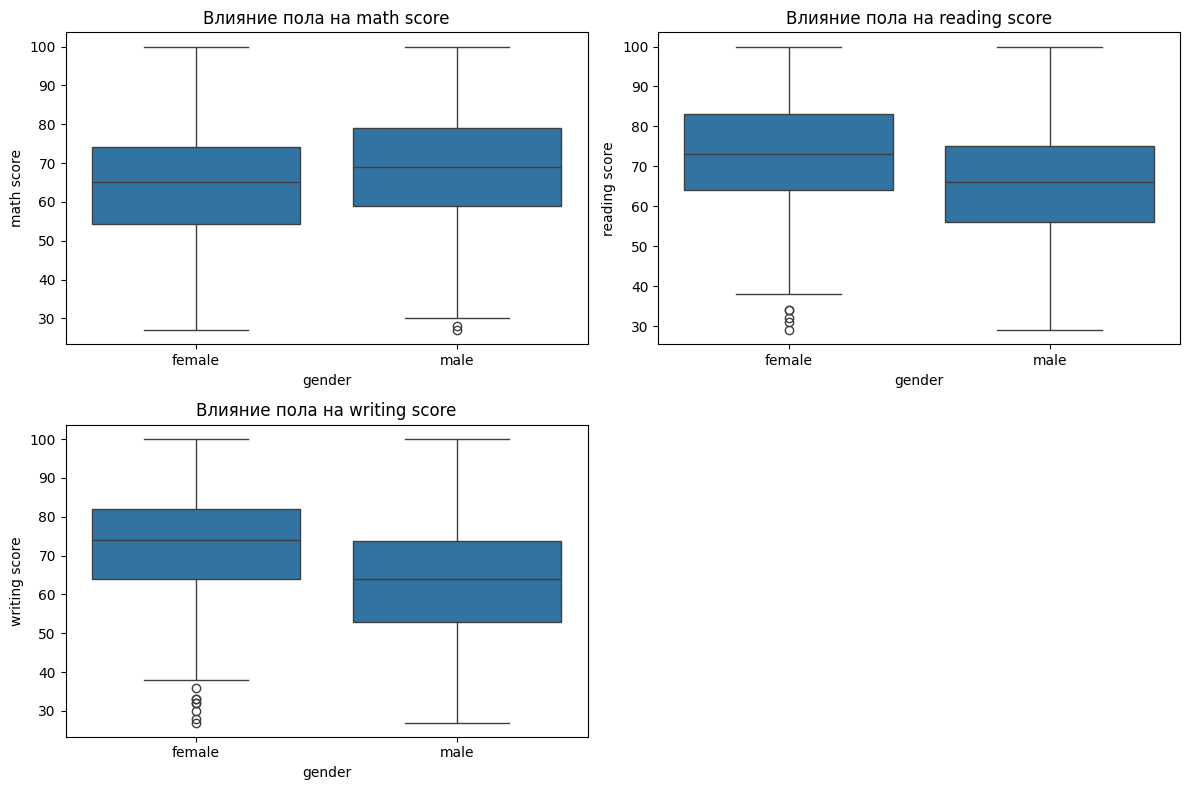

In [371]:
# Влияние пола на оценки
plt.figure(figsize=(12, 8))

# Boxplot для math score по полу
plt.subplot(2, 2, 1)
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Влияние пола на math score')

# Boxplot для reading score по полу
plt.subplot(2, 2, 2)
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Влияние пола на reading score')

# Boxplot для writing score по полу
plt.subplot(2, 2, 3)
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Влияние пола на writing score')

plt.tight_layout()
plt.show()


Женщины, как правило, демонстрируют лучшие результаты в чтении и письме, чем мужчины, в то время как в математике различие менее выражено.

Для мужчин характерны выбросы с низкими оценками в чтении и письме, что может свидетельствовать о необходимости дополнительной поддержки или изменений в методиках обучения.

Женщины могут иметь более высокие и стабильные результаты, что также заслуживает внимания для дальнейших исследований.

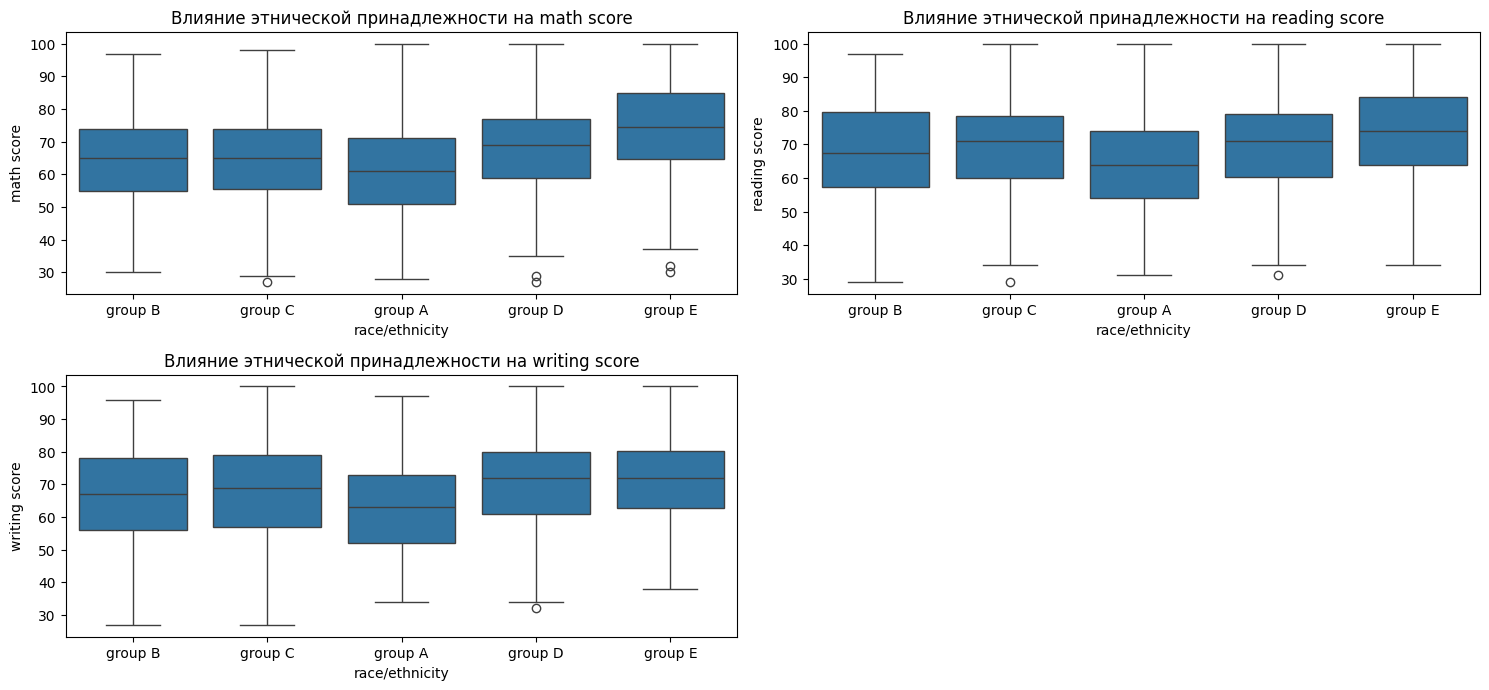

In [372]:
# Влияние этнической принадлежности на оценки
plt.figure(figsize=(15, 10))

# Boxplot для math score по этнической принадлежности
plt.subplot(3, 2, 1)
sns.boxplot(x='race/ethnicity', y='math score', data=df)
plt.title('Влияние этнической принадлежности на math score')

# Boxplot для reading score по этнической принадлежности
plt.subplot(3, 2, 2)
sns.boxplot(x='race/ethnicity', y='reading score', data=df)
plt.title('Влияние этнической принадлежности на reading score')

# Boxplot для writing score по этнической принадлежности
plt.subplot(3, 2, 3)
sns.boxplot(x='race/ethnicity', y='writing score', data=df)
plt.title('Влияние этнической принадлежности на writing score')

plt.tight_layout()
plt.show()


Этническая принадлежность имеет значительное влияние на успеваемость студентов, особенно между группами с более высокими и более низкими результатами. Это подтверждается тем, что группы E и D стабильно показывают более высокие результаты, чем другие.

Этот фактор следует учитывать при разработке методов поддержания успеха студентов, особенно в группах с более низкими результатами.

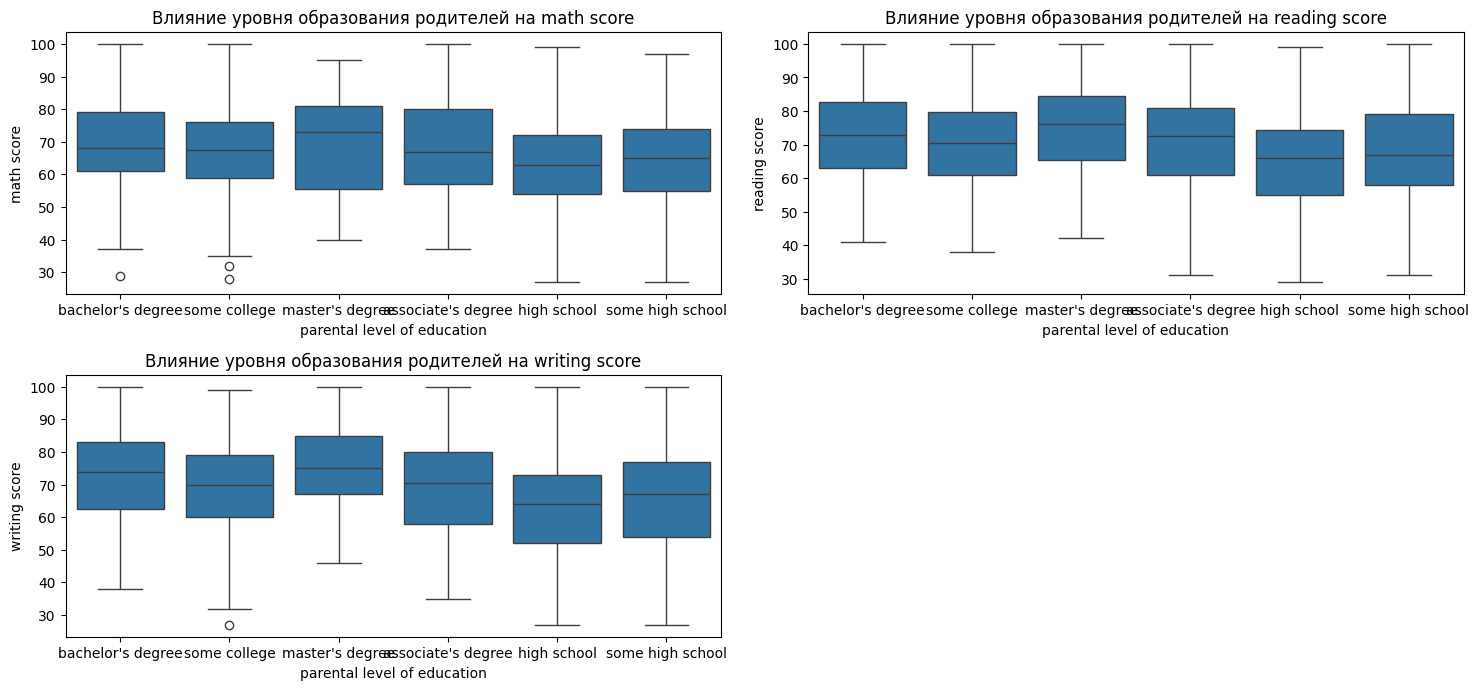

In [373]:
# Влияние уровня образования родителей на оценки
plt.figure(figsize=(15, 10))

# Boxplot для math score по уровню образования родителей
plt.subplot(3, 2, 1)
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Влияние уровня образования родителей на math score')

# Boxplot для reading score по уровню образования родителей
plt.subplot(3, 2, 2)
sns.boxplot(x='parental level of education', y='reading score', data=df)
plt.title('Влияние уровня образования родителей на reading score')

# Boxplot для writing score по уровню образования родителей
plt.subplot(3, 2, 3)
sns.boxplot(x='parental level of education', y='writing score', data=df)
plt.title('Влияние уровня образования родителей на writing score')

plt.tight_layout()
plt.show()


Уровень образования родителей оказывает значительное влияние на успеваемость студентов по всем предметам: математике, чтению и письму. Студенты с родителями, имеющими высшее образование (особенно степень бакалавра или выше), показывают наивысшие результаты, а также более стабильные оценки.  

Студенты с родителями, имеющими среднее образование или диплом старшей школы, имеют более низкие результаты и большую вариативность, что может свидетельствовать о разнице в образовательных возможностях, доступных этим студентам.  

Выбросы в некоторых группах (особенно у студентов с родителями с средним образованием и дипломом старшей школы) могут указывать на случаи, когда студенты из этих категорий столкнулись с дополнительными трудностями в учебе, возможно, из-за менее квалифицированных условий обучения или недостаточной поддержки.

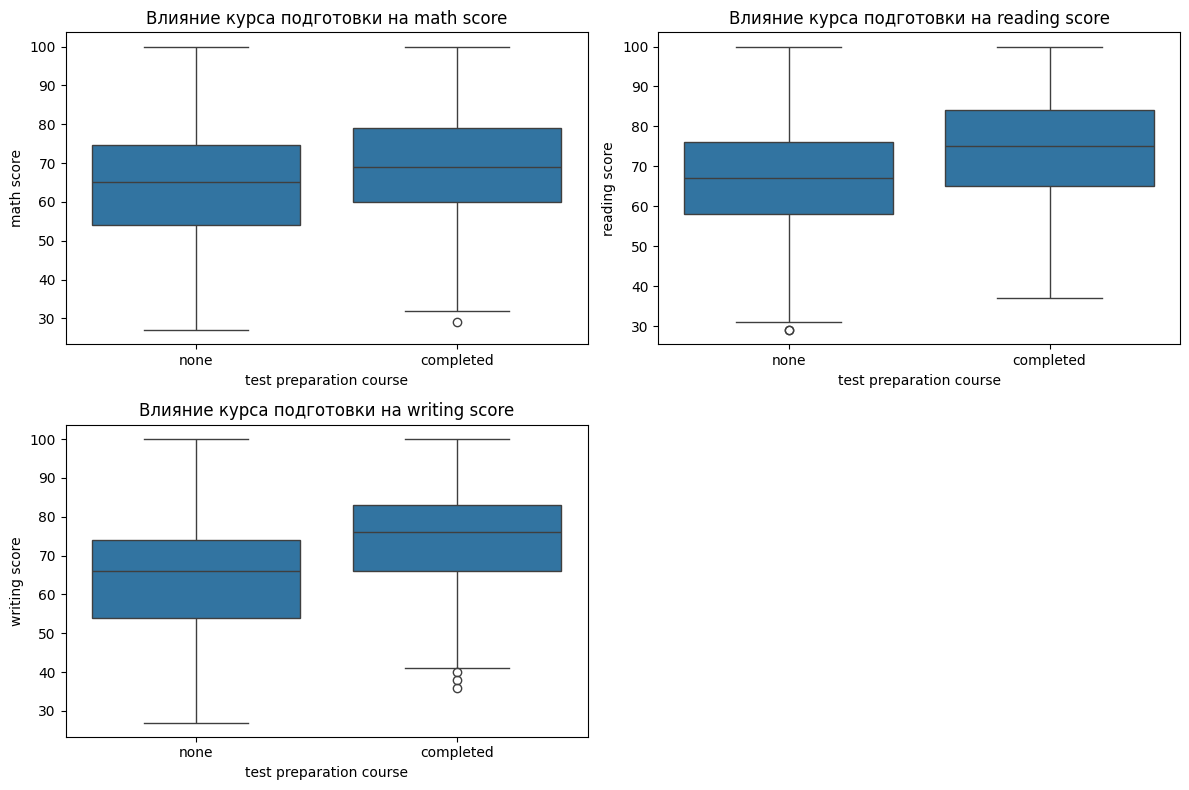

In [374]:
# Влияние курса подготовки на оценки
plt.figure(figsize=(12, 8))

# Boxplot для math score по курсу подготовки
plt.subplot(2, 2, 1)
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Влияние курса подготовки на math score')

# Boxplot для reading score по курсу подготовки
plt.subplot(2, 2, 2)
sns.boxplot(x='test preparation course', y='reading score', data=df)
plt.title('Влияние курса подготовки на reading score')

# Boxplot для writing score по курсу подготовки
plt.subplot(2, 2, 3)
sns.boxplot(x='test preparation course', y='writing score', data=df)
plt.title('Влияние курса подготовки на writing score')

plt.tight_layout()
plt.show()


Курс подготовки оказывает положительное влияние на успеваемость студентов во всех трех предметах, особенно по математике и письму.  

Студенты, прошедшие курс подготовки, имеют значительно более высокие оценки и меньше выбросов с низкими баллами.

Это подтверждает важность подготовки студентов перед экзаменами, что помогает улучшить их успеваемость и снизить уровень неудач в учебе.

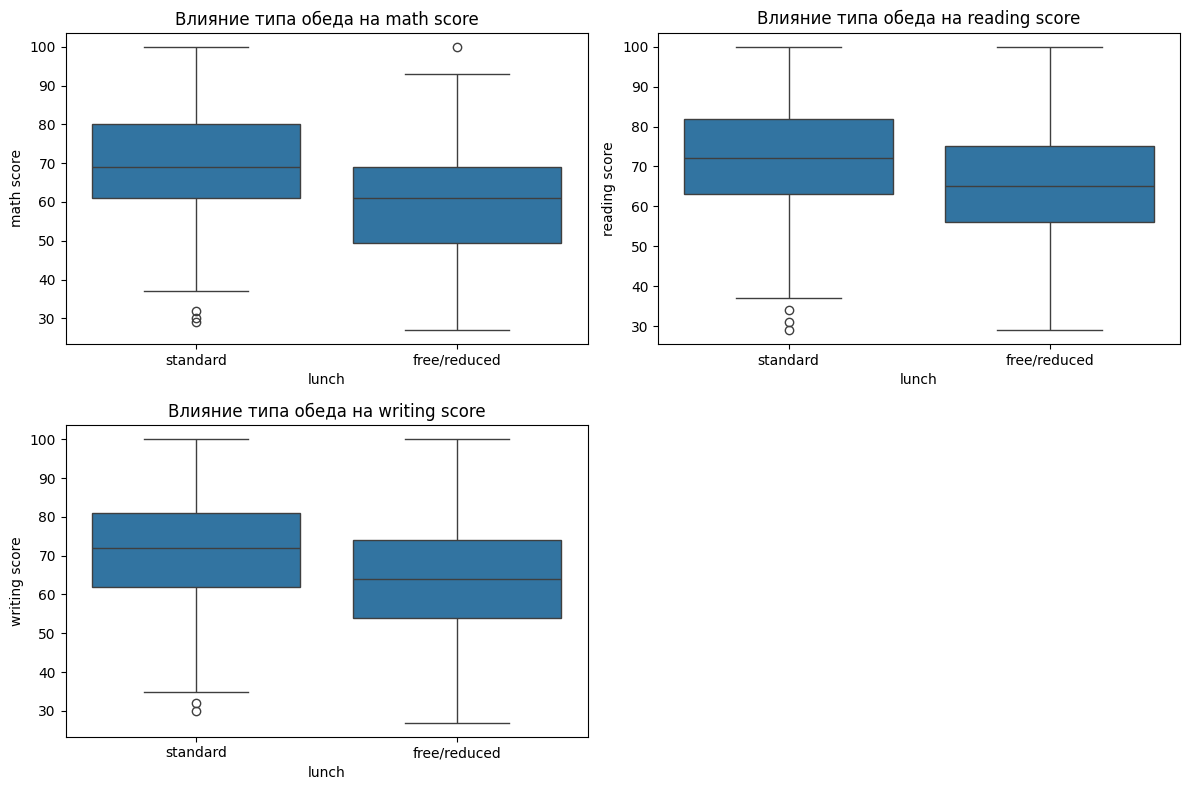

In [375]:
# Влияние курса подготовки на оценки
plt.figure(figsize=(12, 8))

# Boxplot для math score по курсу подготовки
plt.subplot(2, 2, 1)
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Влияние типа обеда на math score')

# Boxplot для reading score по курсу подготовки
plt.subplot(2, 2, 2)
sns.boxplot(x='lunch', y='reading score', data=df)
plt.title('Влияние типа обеда на reading score')

# Boxplot для writing score по курсу подготовки
plt.subplot(2, 2, 3)
sns.boxplot(x='lunch', y='writing score', data=df)
plt.title('Влияние типа обеда на writing score')

plt.tight_layout()
plt.show()

Тип обеда действительно может оказывать влияние на успеваемость студентов. Разница в оценках между группами standard и free/reduced указывает на то, что этот признак важен для анализа.

Студенты с бесплатными обедами в среднем показывают меньше стабильности в результатах, что можно связать с другими социальными и экономическими факторами, влияющими на их учебный процесс.

p-значение: 0.48669808284196514


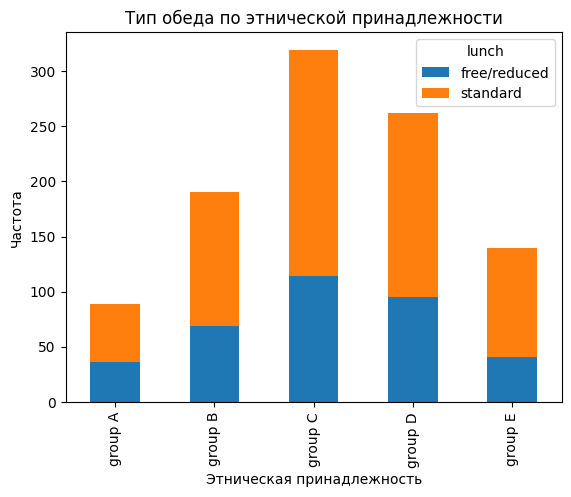

In [376]:
from scipy.stats import chi2_contingency

# Создаем кросс-таблицу
crosstab = pd.crosstab(df['lunch'], df['race/ethnicity'])

# Выполняем хи-квадрат тест
chi2, p_value, dof, expected = chi2_contingency(crosstab)

# Выводим результаты
print(f"p-значение: {p_value}")

import matplotlib.pyplot as plt

# Строим столбчатую диаграмму с накоплением
crosstab = pd.crosstab(df['race/ethnicity'], df['lunch'])

# Строим график
crosstab.plot(kind='bar', stacked=True)
plt.title('Тип обеда по этнической принадлежности')
plt.xlabel('Этническая принадлежность')
plt.ylabel('Частота')
plt.show()

p-значение больше 0.05, это означает, что тип обеда, скорее всего, не зависит от этнической принадлежности студентов в данном наборе данных, и можно сделать вывод, что этническая принадлежность не оказывает влияния на распределение типов обеда среди студентов.

Несмотря на различия в частотах типов обеда среди различных этнических групп (например, группа C имеет значительно больше студентов с стандартным обедом, чем с бесплатным), не существует статистически значимой связи между этими двумя переменными.

Это может означать, что тип обеда для студентов в разных этнических группах распределяется случайным образом и не имеет четкой зависимости от этнической принадлежности.

Исходя из анализа и результатов, мы можем выбрать только те признаки, которые действительно оказывают влияние на успеваемость студентов:

1. gender (пол) — оказывает влияние на успеваемость, особенно в письме и чтении.  
2. parental level of education (уровень образования родителей) — важный фактор, сильно влияющий на успеваемость.
3. test preparation course (курс подготовки к тесту) — влияет на результаты студентов, особенно по математике и письму.
4. lunch (тип обеда) — имеет влияние, хоть и менее выраженное, но все же важно для предсказания успеваемости.
5. race/ethnicity (этническая принадлежность) — оказывает влияние на успеваемость, особенно в различиях между группами с высокими и низкими результатами.

Эти признаки имеют заметное влияние на успеваемость студентов, и они будут полезны для построения более точной модели.

### Выявление проблем датасета

Оценим распределение признаков и сбалансированность данных, смещение по каждому признаку. 

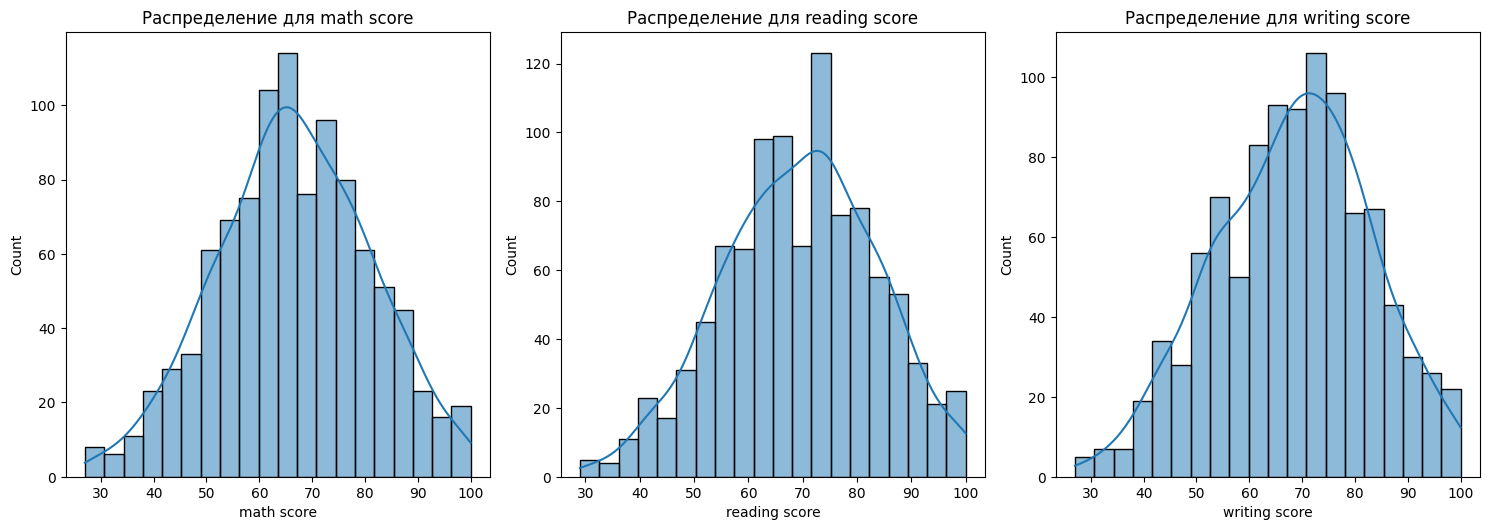

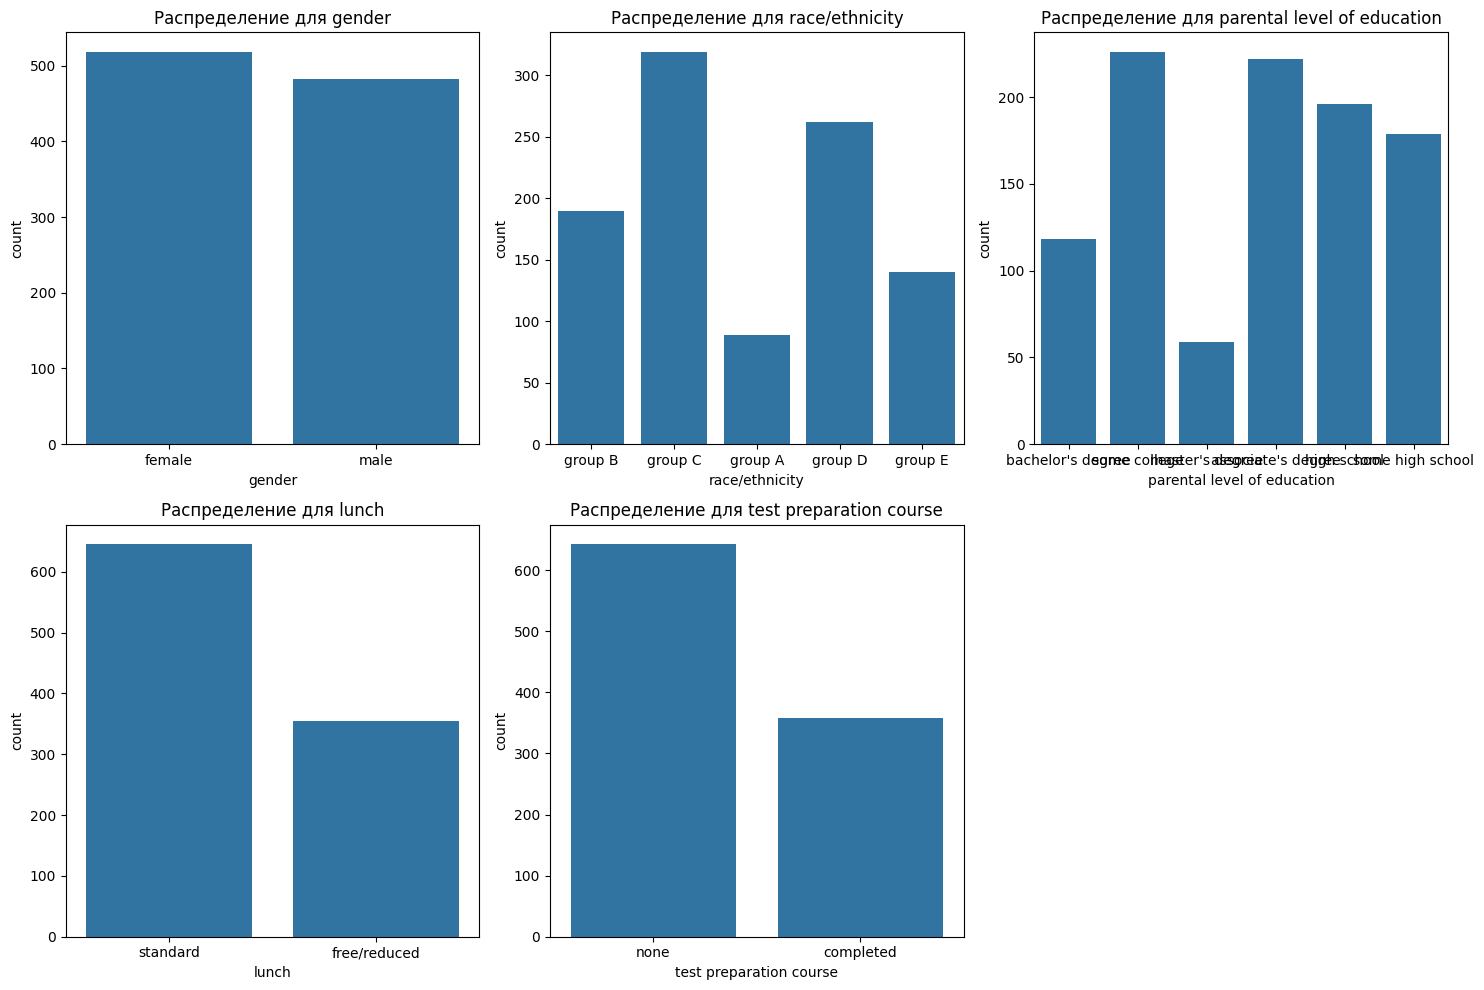

Коэффициенты асимметрии (skewness):
math score: -0.06868258599956258
reading score: -0.13966907569164858
writing score: -0.16409966338743373


In [377]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Строим гистограммы для количественных признаков
def plot_histograms(df, numerical_columns):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[column], kde=True, bins=20)
        plt.title(f'Распределение для {column}')
    plt.tight_layout()
    plt.show()

# Строим барплоты для категориальных признаков
def plot_barplots(df, categorical_columns):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 3, i)
        sns.countplot(data=df, x=column)
        plt.title(f'Распределение для {column}')
    plt.tight_layout()
    plt.show()

# Вычисляем коэффициент асимметрии (skewness) для количественных признаков
def check_skewness(df, numerical_columns):
    skewness = {}
    for column in numerical_columns:
        skewness[column] = skew(df[column])
    print("Коэффициенты асимметрии (skewness):")
    for column, value in skewness.items():
        print(f"{column}: {value}")



# Указываем признаки для анализа
numerical_columns = ['math score', 'reading score', 'writing score']
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Визуализируем распределения признаков
plot_histograms(df, numerical_columns)
plot_barplots(df, categorical_columns)

# Проверяем на смещение (skewness)
check_skewness(df, numerical_columns)


**Распределение оценок:**

Все три оценки (математика, чтение, письмо) имеют нормальное или близкое к нормальному распределение, с небольшим левым смещением. Это означает, что большинство студентов набирают средние баллы, а на крайних значениях (как низкие, так и высокие) распределение становится реже.

Таким образом, модель, вероятно, будет работать хорошо, так как данные достаточно близки к нормальному распределению, что способствует лучшему обучению модели.

**Смещение (Skewness):**

Смещение не очень сильное. Для большинства признаков смещение не критичное, так как коэффициенты асимметрии близки к нулю, но все же указывают на небольшое смещение влево. Это может означать, что студенты с низкими оценками по этим предметам встречаются чаще, чем с высокими.

**Группировка категориальных признаков:**

1. Пол: Данные сбалансированы между мужчинами и женщинами.
2. Этническая принадлежность: Распределение студентов неравномерное, с наибольшим количеством студентов в группе C, что важно учитывать при обучении модели.
3. Уровень образования родителей: Студенты с родителями, имеющими диплом бакалавра, составляют наибольшую часть данных.
4. Тип обеда: Преобладание студентов с стандартным обедом над бесплатным/сниженным.
5. Курс подготовки: Большинство студентов не прошли курс подготовки, что нужно учитывать в модели.


Для корректной работы модели стоит обратить внимание на несбалансированность данных по таким признакам, как тип обеда и курс подготовки, что может потребовать дополнительной обработки данных (например, с использованием методов балансировки данных).

### Разбиение датасета на три части: обучающую, контрольную и тестовую выборки

Обучающая выборка (training set): используется для обучения модели. Это основная часть данных, на которой модель обучается находить зависимости.

Валидационная выборка (validation set): используется для настройки гиперпараметров модели. Во время обучения модель проверяется на этой выборке, чтобы выбрать оптимальные параметры и избежать переобучения.

Тестовая выборка (test set): используется для окончательной проверки модели после завершения процесса обучения. Тестовые данные не используются в процессе обучения и позволяют объективно оценить качество модели.

In [378]:
from sklearn.model_selection import train_test_split

# Предполагаем, что df — это DataFrame, содержащий все ваши данные
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]  # Признаки
y = df[['math score', 'reading score', 'writing score']]  # Несколько целевых признаков

# Разбиение на обучающую и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Разбиение временной выборки на контрольную и тестовую
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Печатаем размеры выборок
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер контрольной выборки: {X_val.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (700, 5)
Размер контрольной выборки: (150, 5)
Размер тестовой выборки: (150, 5)



### Оценка сбалансированности выборок


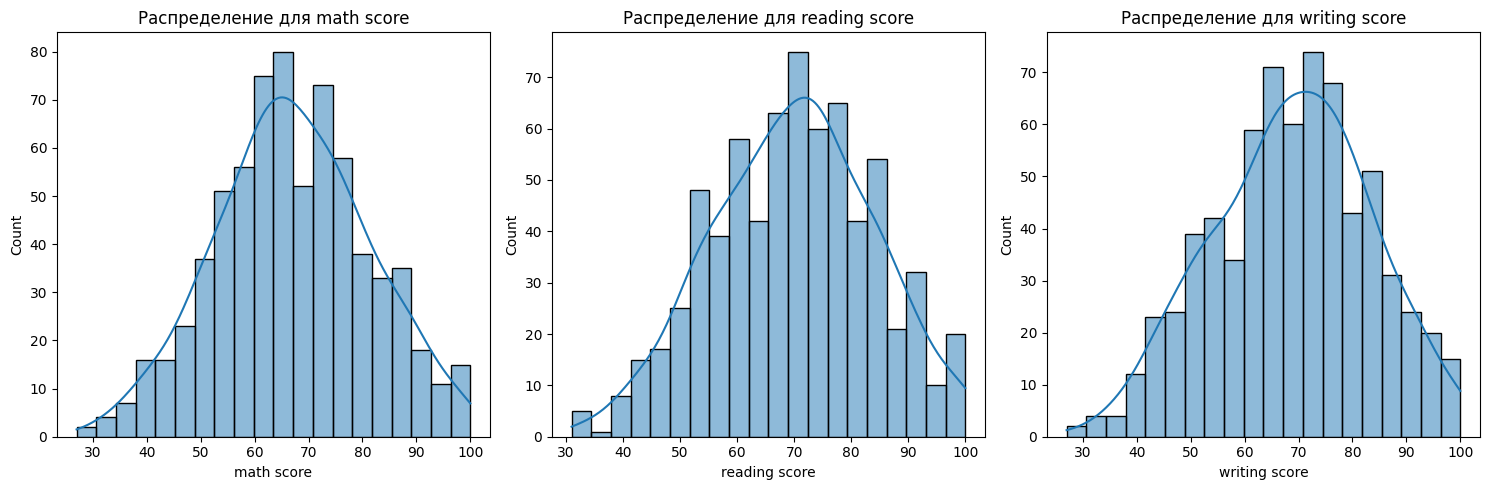

Коэффициенты асимметрии (skewness) для целевых переменных:
math score: -0.009831373587054385
reading score: -0.09142001190462311
writing score: -0.14592365848290204


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Строим гистограммы и рассчитываем skewness для количественных признаков
def plot_numerical_balance(y_train):
    plt.figure(figsize=(15, 5))
    skewness = {}
    for i, column in enumerate(y_train.columns, 1):
        # Гистограмма с плотностью
        plt.subplot(1, 3, i)
        sns.histplot(y_train[column], kde=True, bins=20)
        plt.title(f'Распределение для {column}')
        
        # Вычисление skewness
        skewness[column] = skew(y_train[column])
    
    plt.tight_layout()
    plt.show()

    # Вывод коэффициентов асимметрии (skewness)
    print("Коэффициенты асимметрии (skewness) для целевых переменных:")
    for column, value in skewness.items():
        print(f"{column}: {value}")

# Оценка сбалансированности количественных признаков
plot_numerical_balance(y_train)


Все целевые переменные (оценки) имеют незначительное смещение влево, что говорит о том, что большинство студентов набирают средние и ниже средние баллы. Эти данные не требуют аугментации с точки зрения смещения.